# Author : Anusua Pani

### GRIP @ The Sparks Foundation

### Data Science & Business Analytics Intern

#### Batch: January,2024

##### Task 3:  Exploratory Data Analysis- Retail

Step 1: Importing the required Python libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Step 2: Importing the data from given external link

In [3]:
df=pd.read_csv("C:/Users/Anusua Pani/OneDrive/Documents/Sample Superstore EDA.csv",encoding="unicode_escape")

In [11]:
df.shape

(9994, 13)

In [12]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [14]:
pd.isnull(df).sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
df["Quantity"].dtype

dtype('int64')

In [19]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


##### Which city has maximum sales?

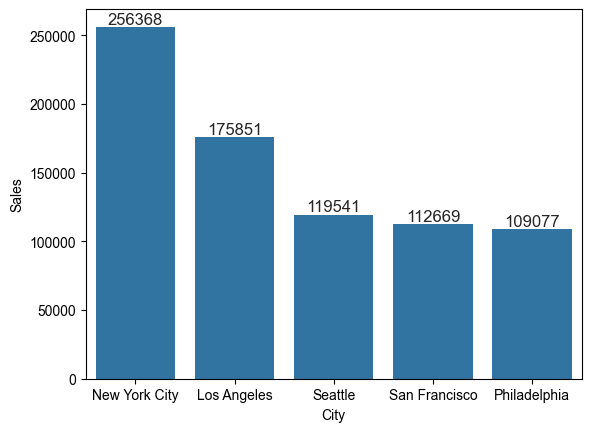

In [5]:
Sales_city=df.groupby("City",as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False).head()
ax=sns.barplot(x="City",y="Sales",data=Sales_city)
sns.set(rc={"figure.figsize":(10,5)})
for bars in ax.containers:
    ax.bar_label(bars)

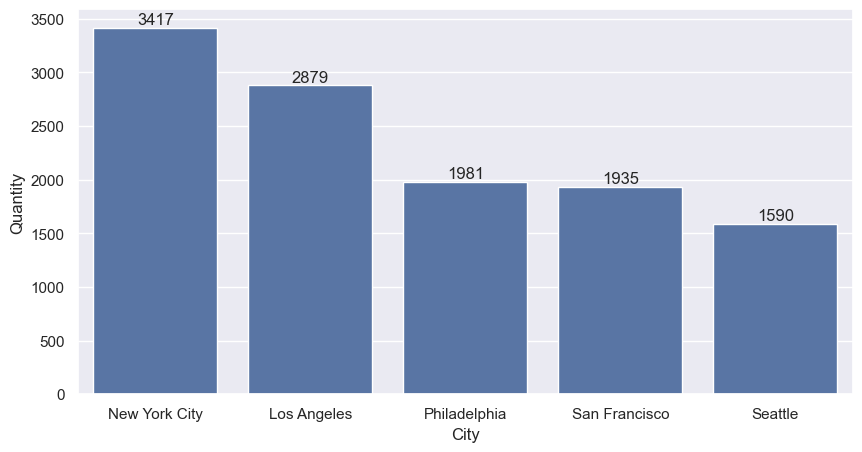

In [10]:
Quantity_city=df.groupby("City",as_index=False)["Quantity"].sum().sort_values(by="Quantity", ascending=False).head()
ax=sns.barplot(x="City",y="Quantity",data=Quantity_city)
sns.set(rc={"figure.figsize":(10,5)})
for bars in ax.containers:
    ax.bar_label(bars)

##### Both in terms of Sales & Quantity New York City has maximum Sales.

C:\Users\Anusua Pani\AppData\Local\Temp\ipykernel_22820\2903978019.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Sub_Category, rotation='vertical', size=8)


[Text(0, 0, 'Accessories'),
 Text(1, 0, 'Appliances'),
 Text(2, 0, 'Art'),
 Text(3, 0, 'Binders'),
 Text(4, 0, 'Bookcases'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Copiers'),
 Text(7, 0, 'Envelopes'),
 Text(8, 0, 'Fasteners'),
 Text(9, 0, 'Furnishings'),
 Text(10, 0, 'Labels'),
 Text(11, 0, 'Machines'),
 Text(12, 0, 'Paper'),
 Text(13, 0, 'Phones'),
 Text(14, 0, 'Storage'),
 Text(15, 0, 'Supplies'),
 Text(16, 0, 'Tables')]

<Figure size 4000x2400 with 0 Axes>

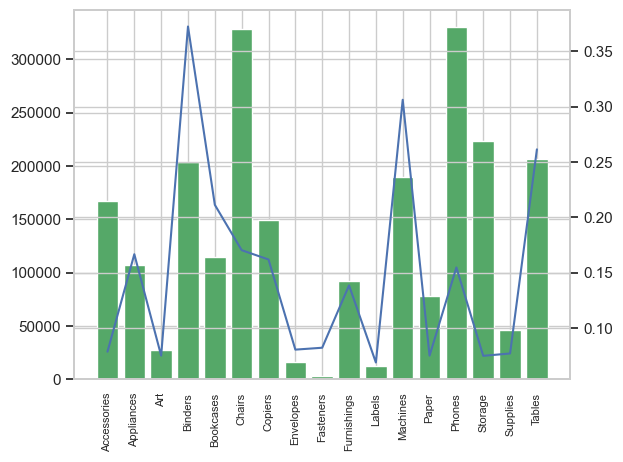

In [21]:
df["Sub-Category"]=df["Sub-Category"].astype(str)
Sales=df.groupby("Sub-Category")["Sales"].sum()
Discount=df.groupby("Sub-Category")["Discount"].mean()
Sub_Category=df.groupby("Sub-Category")["Sales"].sum().index
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(Sub_Category, Sales, color='g')
ax2.plot(Sub_Category, Discount, 'b-')
ax1.set_xticklabels(Sub_Category, rotation='vertical', size=8)

##### Products with higher average discounts see maximum sales. However in case of "Storage" sales is higher inspite of lower discount.

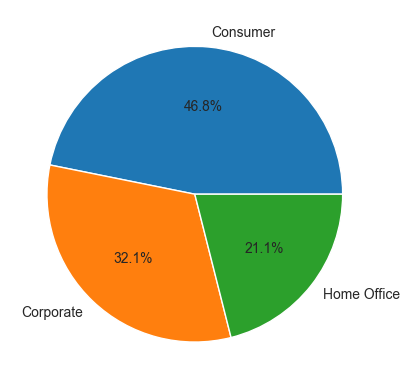

In [19]:
Segment_sales=df.groupby("Segment")["Profit"].sum()
plt.pie(Segment_sales,labels=Segment_sales.index,autopct="%1.1f%%")
plt.show()

##### Consumer segment is contributing to most of the Profit.

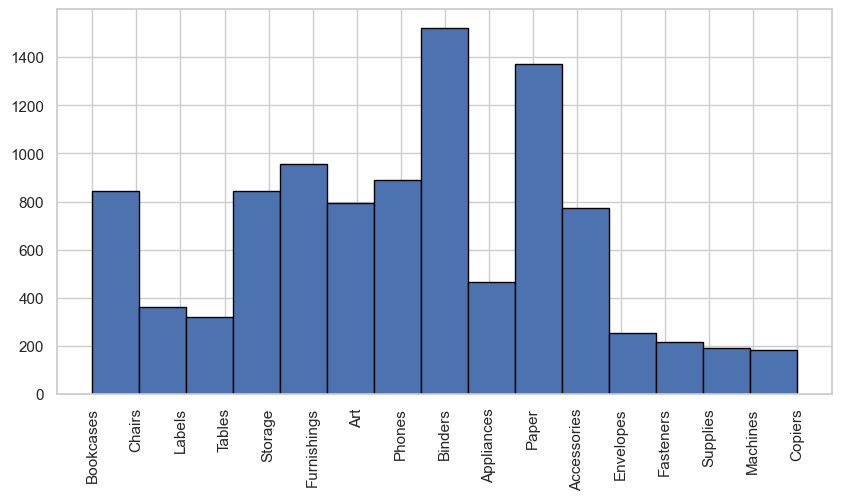

In [22]:
df["Sub-Category"]=df["Sub-Category"].astype(str)
Column_data=df["Sub-Category"]
plt.figure(figsize=(10,5))
plt.hist(Column_data,bins=15,edgecolor="Black")
plt.xticks(rotation=90)
plt.show()

##### Phones, appliances, and storage are some of the most frequently purchased products. To boost revenue, consider offering additional discounts on storage items.







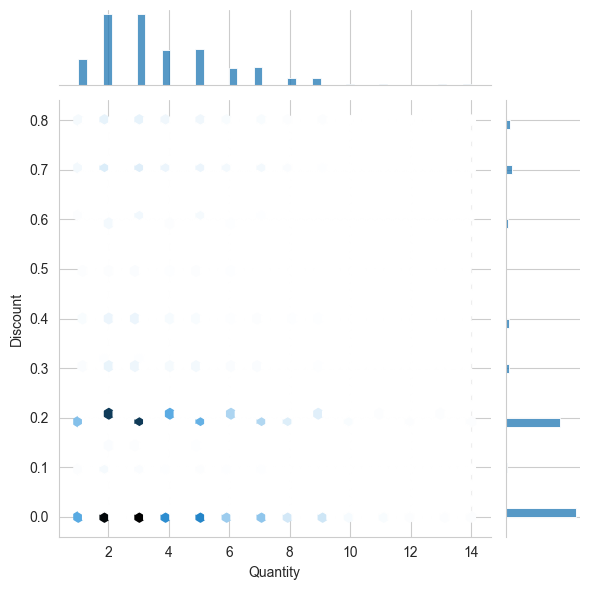

In [39]:
sns.jointplot(x="Quantity",y="Discount",data=df,kind="hex")

##### There isn't a discernible correlation between the discount amount and the quantities purchased. However, it's noteworthy that a majority of customers tend to purchase quantities ranging from 2 to 4.

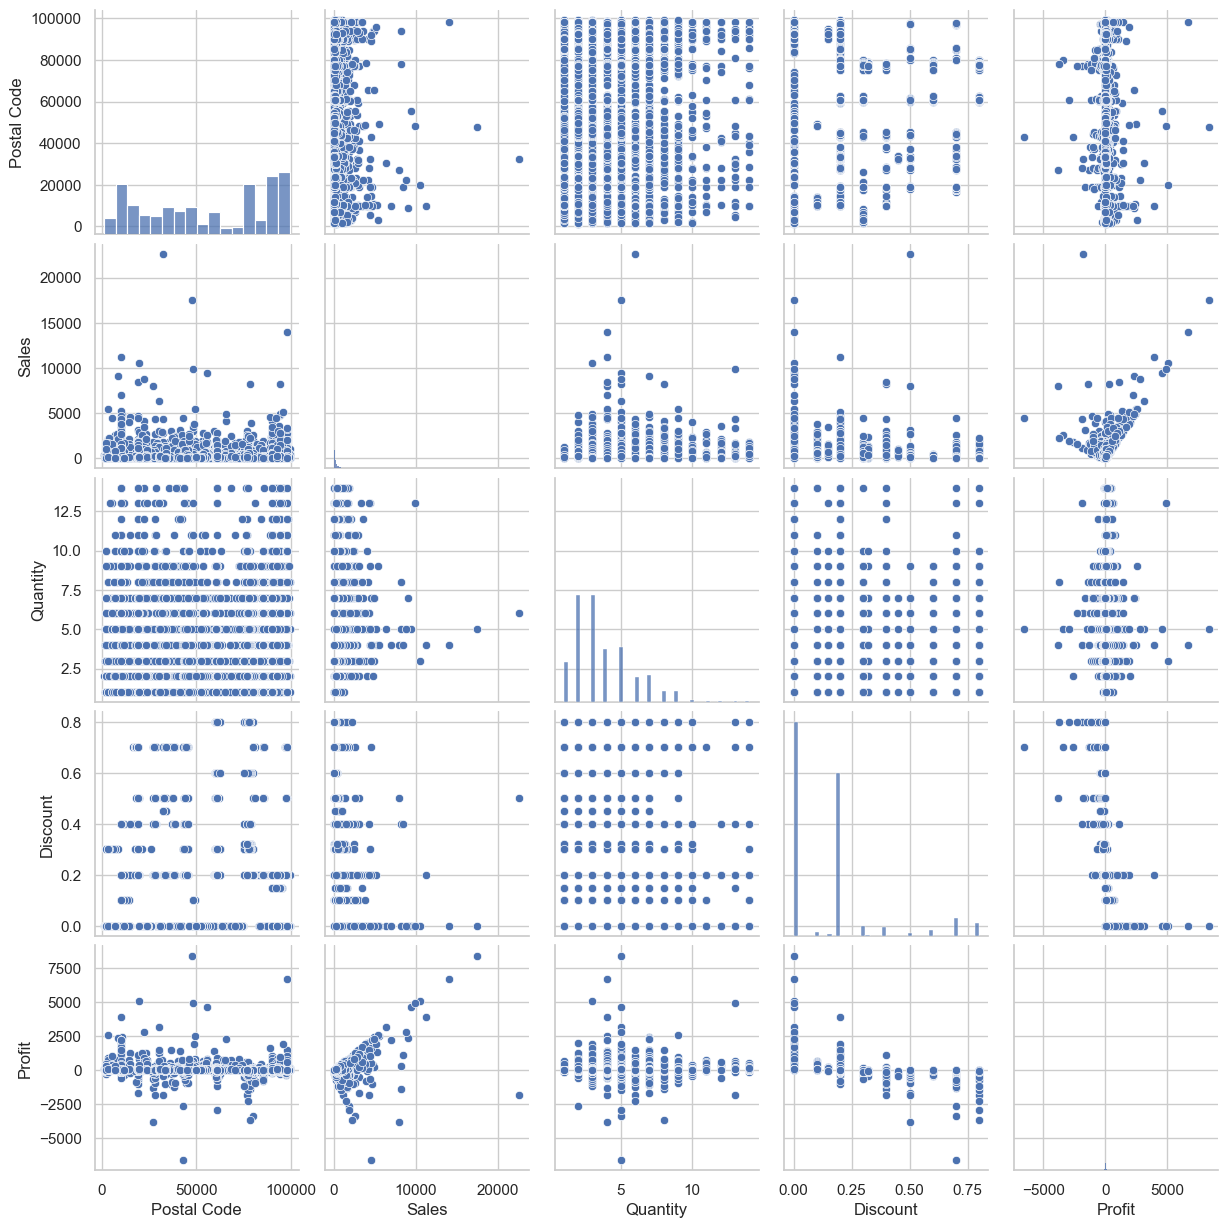

In [17]:
sns.pairplot(df)

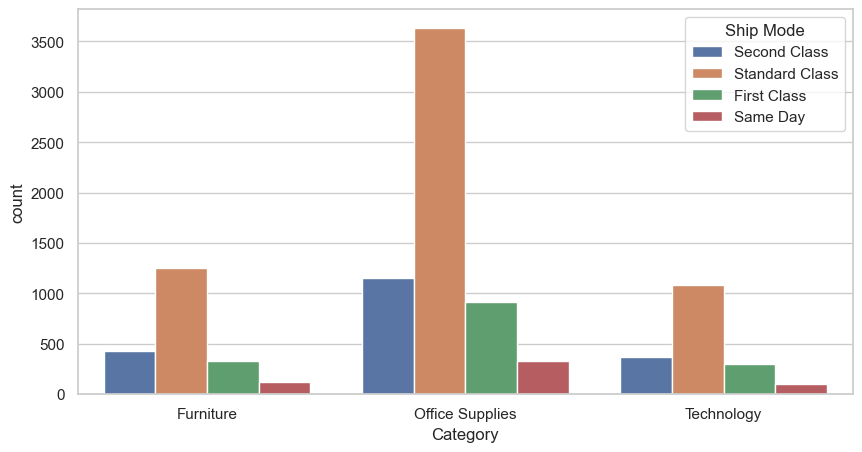

In [23]:
df["Category"]=df["Category"].astype(str)
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x="Category",hue="Ship Mode")
plt.show()

##### The majority of orders in all categories are shipped using the Standard Class delivery option.

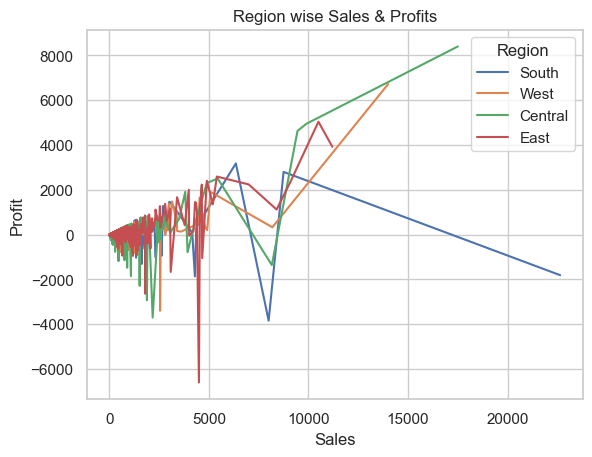

In [26]:
sns.lineplot(x="Sales",y="Profit",data=df,hue="Region")
plt.title("Region wise Sales & Profits")
plt.show()

##### As sales increases beyond a certain amount profit follows a rising trend in both Central & Western region.

Text(0.5, 1.0, 'Profit vs Discount')

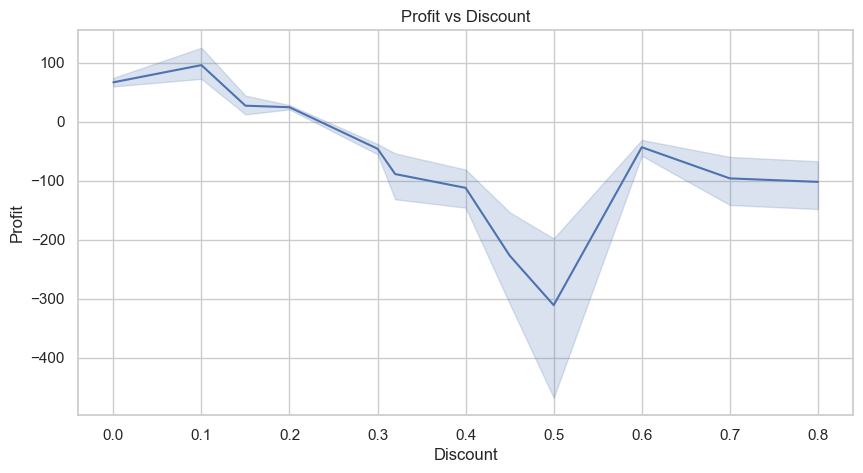

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Discount",y="Profit",data=df)
plt.title("Profit vs Discount")


##### Initially, as more discounts are provided, profits decrease; however, they later rebound and reach a plateau.

Text(0.5, 1.0, 'Sales vs Discount')

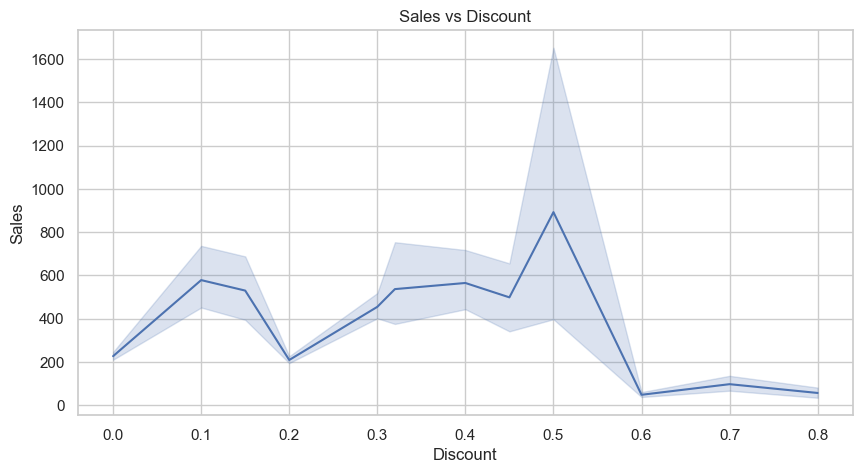

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Discount",y="Sales",data=df)
plt.title("Sales vs Discount")

##### As the discount increases, sales exhibit a fluctuating trend.